# Here
basic Data Analysis of Votes data for 39 Art Works rated by 48 participants with 1 to 5 score. 

### project

Analyzing and Preparing Data for Learning Algoritms to give user recomendations based on their previous choice

by AnnaKonda (annakonda.guru annakonda.live annakonda.co annakonda.online ) https://github.com/annakoopenu/PeoplePeoplePeople

### about the data

Based on db:
 https://www.kaggle.com/miroslavsabo/paintings
 https://www.kaggle.com/anako2020/paintings-data-exploration
 
 39 Art Works by famous painters 
 Rated by 48 questionary participant's score 1 to 5

using only 3 python's packages
- pandas
- numpy
- matplotlib.pyplot 


# Step 0 - Loading the Data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [68]:
# data
# paintings.csv

In [69]:
# Create dataframe  
people_file_location = 'paintings.csv'
df_orig = pd.read_csv(people_file_location)

# Step 1 - Data First Overlook

Overlook at the given data, it's volume, columns types and features. 


In [70]:
df_orig.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S42,S43,S44,S45,S46,S47,S48,art movement,artist,painting
0,3,2,3,1,1,1,2,2,3,1,...,2,1,2,2,4,2,2,Renaissance,Sandro Botticelli,The Birth of Venus
1,2,2,2,4,1,1,2,3,4,3,...,4,4,1,4,2,2,1,Renaissance,Leonardo da Vinci,Lady with an Ermine
2,1,3,3,1,1,1,5,2,1,2,...,1,1,1,4,3,1,3,Renaissance,Raphael,Three Graces
3,5,3,1,1,1,1,3,3,1,1,...,2,3,1,1,3,2,5,Baroque,Caravaggio,Entombment
4,2,2,2,1,1,1,1,2,1,1,...,1,1,2,1,4,2,4,Baroque,Diego Velazquez,Rokeby Venus


In [71]:
df_orig['art movement'].unique().tolist()

['Renaissance',
 'Baroque',
 'Neoclassicism',
 'Romanticism',
 'Impressionism',
 'Post-Impressionism',
 'Symbolism',
 'Art Nouveau',
 'Cubism',
 'Abstract art',
 'Surrealism',
 'Op art',
 'Pop art']

48 participants rated 39 paintings of 39 different artists, 3 for each of 13 different art movements.
For example, 'Art Nouveau' movement consists of 3 following paintings by 3 artists: Gustav Klimt, Pierre Bonnard and Alfonz Mucha.


### (1) art piece's rating

In [72]:
df_rating = pd.DataFrame(df_orig)
df_rating = df_rating.set_index('artist')
df_rating = df_rating.drop(columns=['art movement','painting'])
df_rating.head(3)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48
artist,,,,,,,,,,,,,,,,,,,,,
Sandro Botticelli,3,2,3,1,1,1,2,2,3,1,...,2,2,3,2,1,2,2,4,2,2
Leonardo da Vinci,2,2,2,4,1,1,2,3,4,3,...,3,4,4,4,4,1,4,2,2,1
Raphael,1,3,3,1,1,1,5,2,1,2,...,1,1,2,1,1,1,4,3,1,3


In [73]:
# Statistics for votes of 48 voters
df_rating.describe().loc[['count','mean','std']]

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2.743590,2.307692,2.564103,2.256410,2.051282,2.102564,2.512821,2.384615,1.897436,2.948718,...,2.589744,2.538462,2.743590,2.794872,3.333333,3.230769,3.102564,3.461538,2.871795,4.051282
std,1.332152,1.320961,1.142363,1.633819,1.431759,1.428928,1.519553,1.205588,1.119090,1.588590,...,1.481783,1.392577,1.332152,1.417550,1.611363,1.441153,1.209499,0.969160,1.301406,1.316869


In [74]:
mean_rate = round(df_rating.describe().loc['mean'].mean(), 2)
mean_rate

2.81

In [75]:
mean_rate_std = round(df_rating.describe().loc['std'].mean(), 2)
mean_rate_std

1.38

In [76]:
raitings = df_rating.describe().loc['mean']
raitings = np.sort(raitings)

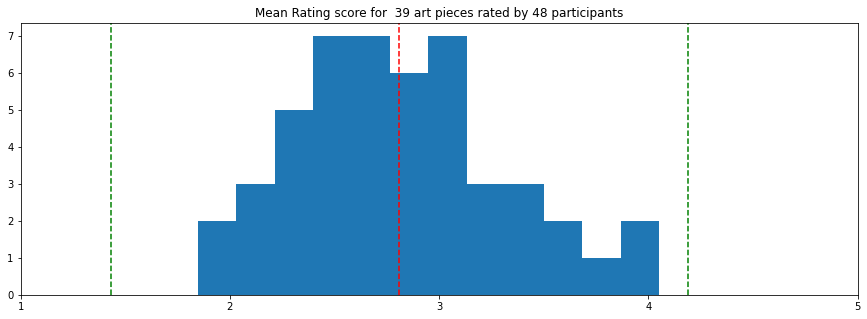

In [77]:
# show histogram for Artist's rating score 
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(raitings, bins = 12)
ax.set_title('Mean Rating score for  ' + str(df_rating.shape[0]) +' art pieces' + ' rated by 48 participants')
ax.set_xticks([1,2,3,4,5])

ax.axvline(mean_rate, ls='--', color='r', label=str(mean_rate))
ax.axvline(mean_rate + mean_rate_std, ls='--', color='g', label=str('+std'))
ax.axvline(mean_rate - mean_rate_std, ls='--', color='g', label=str('-std'))

#ax.set_xlabel(str(mean_rate), color='r')

fig.show()

### (2) participant's scores

In [78]:
df_scores = pd.DataFrame(df_rating)
df_scores = df_scores.transpose()
df_scores.head(3)

artist,Sandro Botticelli,Leonardo da Vinci,Raphael,Caravaggio,Diego Velazquez,Rembrandt van Rijn,Jacques-Louis David,Jean-Auguste-Dominique Ingres,Francisco Goya,Eugene Delacroix,...,Kazimir Malevich,Salvador Dali,Max Ernst,Rene Magritte,Victor Vasarely,Bridget Riley,Jesus-Rafael Soto,Andy Warhol,Jasper Johns,Tony Griffin
S1,3,2,1,5,2,5,4,2,1,3,...,1,4,1,5,2,1,1,4,2,2
S2,2,2,3,3,2,4,5,1,2,5,...,1,3,1,2,2,1,1,3,2,1
S3,3,2,3,1,2,4,4,1,2,5,...,1,4,3,2,1,3,2,3,5,1


In [79]:
# Statistics for rates of 39 art pieces
df_scores.describe().loc[['count','mean','std']]

artist,Sandro Botticelli,Leonardo da Vinci,Raphael,Caravaggio,Diego Velazquez,Rembrandt van Rijn,Jacques-Louis David,Jean-Auguste-Dominique Ingres,Francisco Goya,Eugene Delacroix,...,Kazimir Malevich,Salvador Dali,Max Ernst,Rene Magritte,Victor Vasarely,Bridget Riley,Jesus-Rafael Soto,Andy Warhol,Jasper Johns,Tony Griffin
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.479167,2.854167,2.020833,2.312500,1.875000,2.916667,3.354167,2.166667,1.625000,3.666667,...,1.791667,3.895833,2.395833,3.437500,3.166667,2.125000,2.041667,3.395833,3.083333,3.520833
std,1.271447,1.202649,1.279787,1.323378,1.084219,1.411704,1.211463,1.098032,1.084219,1.342169,...,1.336211,1.275624,1.283936,1.286695,1.326222,1.265332,1.270924,1.300402,1.396551,1.543546


In [80]:
df_scores.describe().loc['mean'].mean()

2.8066239316239314

In [81]:
mean_score = round(df_scores.describe().loc['mean'].mean(),2)
mean_score

2.81

In [82]:
mean_scores_std = round(df_scores.describe().loc['std'].mean(), 2)
mean_scores_std

1.31

In [83]:
scores = df_scores.describe().loc['mean']
scores = np.sort(scores)

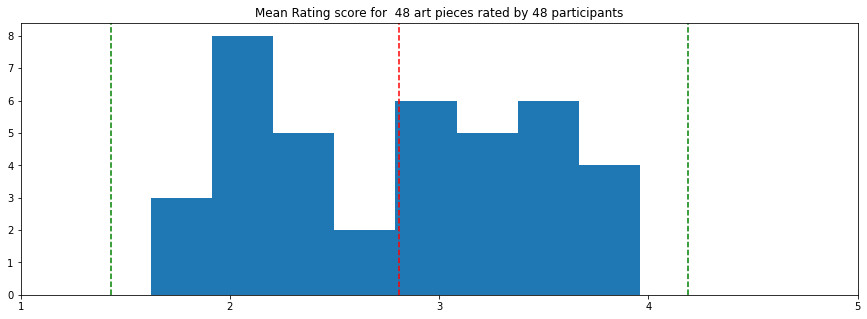

In [84]:
# show histogram for User's rating score 
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(scores, bins = 8)
ax.set_title('Mean Rating score for  ' + str(df_scores.shape[0]) +' art pieces' + ' rated by 48 participants')
ax.set_xticks([1,2,3,4,5])

ax.axvline(mean_rate, ls='--', color='r', label=str(mean_rate))
ax.axvline(mean_rate + mean_rate_std, ls='--', color='g', label=str('+std'))
ax.axvline(mean_rate - mean_rate_std, ls='--', color='g', label=str('-std'))

#ax.set_xlabel(str(mean_rate), color='r')

fig.show()

------------------------------------------------------------------------------------------------------------------

# preliminary conclusions about the data

For binary descision - 2.8 might be used for Like/Dislike dession 